Clean and transform the above dataset to add the following columns: Start year, end year, director, actors.

In [63]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt 

movies_df = pd.read_csv("movies.csv")

movies_df["GENRE"] = [str(s).strip('\n') for s in movies_df["GENRE"]]   #remove whitespace
movies_df["ONE-LINE"] = [str(s).strip('\n') for s in movies_df["ONE-LINE"]]

stars = [list(s.partition("Stars:")) for s in [str(s).replace('\n', '').replace('|', '').strip() for s in movies_df["STARS"]]]
#fix data to partition by "Star:" and remove extra empty strs
for i in range(len(stars)):
    if "Stars:" in stars[i]:
        stars[i].remove("Stars:")
    else: 
        if stars[i][0] == '': #empty list, no actor/director info
            stars[i] = ['', '']
        else:
            stars[i] = list(stars[i][0].partition("Star:"))
            if "Star:" in stars[i]:
                stars[i].remove("Star:")
            else: stars[i].pop(2) #all non-star entries are len 3 so remove last empty entry
    
#remove "Director:"/"Directors:" from director entry
for i in range (len(stars)):
    if stars[i][0] == '':
        continue #skip empty directors
    stars[i][0] = stars[i][0].partition(":")[2].strip() #only get the names after the colon

#join director/ actor column, remove stars column
temp = pd.DataFrame(stars, columns = ["DIRECTORS", "ACTORS"])
movies_df = movies_df.join(temp)
movies_df = movies_df.drop(columns = ["STARS"])

#parse years 

yrs = [re.sub(r'[^–\d]', '', str(yr)) for yr in movies_df["YEAR"]] #remove non digit / dash chars
yrs = [[yr[0], yr[2]] for yr in [list(yr.partition('–')) for yr in yrs]]    #partition by dash

temp = pd.DataFrame(yrs, columns = ["START YEAR", "END YEAR"])

movies_df = movies_df.join(temp)
movies_df = movies_df.drop(columns = ["YEAR"])


print(yrs)



#reorder columns
movies_df = movies_df[["MOVIES", "START YEAR", "END YEAR", "GENRE", "RATING", "ONE-LINE", "DIRECTORS", "ACTORS", "VOTES", "RunTime", "Gross"]]

movies_df.head(100)


[['2021', ''], ['2021', ''], ['2010', '2022'], ['2013', ''], ['2021', ''], ['2020', ''], ['2021', ''], ['2006', '2013'], ['2020', ''], ['2019', ''], ['2021', ''], ['2016', '2021'], ['2021', ''], ['2021', ''], ['2011', ''], ['2005', ''], ['2008', '2013'], ['2017', ''], ['2017', '2021'], ['2016', ''], ['2021', ''], ['1994', '2004'], ['2014', ''], ['2013', ''], ['2021', ''], ['2021', ''], ['2013', '2020'], ['2015', ''], ['2005', '2020'], ['2013', ''], ['2021', ''], ['2016', ''], ['2013', '2022'], ['2003', ''], ['2019', ''], ['2009', '2020'], ['2018', ''], ['2019', ''], ['2010', '2015'], ['2013', '2022'], ['2011', '2019'], ['2017', '2021'], ['2015', '2020'], ['2014', ''], ['2015', ''], ['2011', ''], ['2017', ''], ['2016', ''], ['2021', ''], ['2021', ''], ['2014', ''], ['2005', '2014'], ['2009', '2015'], ['2008', '2014'], ['2016', '2018'], ['2009', '2017'], ['2020', ''], ['2019', ''], ['2018', '2021'], ['2017', '2020'], ['2020', ''], ['2016', ''], ['1987', '1994'], ['2021', ''], ['2021', ''

,MOVIES,START YEAR,END YEAR,GENRE,RATING,ONE-LINE,DIRECTORS,ACTORS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...","21,062",121.0,NaN
1,Masters of the Universe: Revelation,2021,,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",25.0,NaN
2,The Walking Dead,2010,2022,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",44.0,NaN
3,Rick and Morty,2013,,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",23.0,NaN
4,Army of Thieves,2021,,"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Don't Breathe,2016,,"Crime, Horror, Thriller",7.1,"Hoping to walk away with a massive fortune, a ...",Fede Alvarez,"Stephen Lang, Jane Levy, Dylan Minnette, Danie...","237,601",88.0,$89.22M
96,The Ice Road,2021,,"Action, Adventure, Drama",5.6,After a remote diamond mine collapses in far n...,Jonathan Hensleigh,"Liam Neeson, Marcus Thomas, Laurence Fishburne...","20,561",109.0,NaN
97,Arrow,2012,2020,"Action, Adventure, Crime",7.5,Spoiled billionaire playboy Oliver Queen is mi...,,"Stephen Amell, Katie Cassidy, David Ramsey, Su...","414,712",42.0,NaN
98,Orange Is the New Black,2013,2019,"Comedy, Crime, Drama",8.0,Convicted of a decade old crime of transportin...,,"Taylor Schilling, Danielle Brooks, Taryn Manni...","284,554",59.0,NaN


Your company wants to perform some analysis on a movies gross margin.  Please create a new csv that contains a subset of the original data where "Gross" is a known value, and all other numerical statistics are present

In [64]:
gross_df = movies_df.dropna(subset = ["Gross", "RATING", "VOTES", "RunTime"])
print(gross_df.shape)
gross_df.head(100)

gross_df.to_csv("movies_gross.csv")




(460, 11)


Create a visualization to show what (if any) correlation there is between rating and the length of the movie's description.

0       134
1       149
2       128
3        97
5       118
       ... 
9960    147
9961    152
9962    148
9963    135
9979    150
Name: DESCRIPTION LENGTH, Length: 8179, dtype: int64
0       6.1
1       5.0
2       8.2
3       9.2
5       7.6
       ... 
9960    7.1
9961    6.9
9962    7.1
9963    8.2
9979    8.8
Name: RATING, Length: 8179, dtype: float64


Text(0.5, 1.0, 'Rating vs. Description Length')

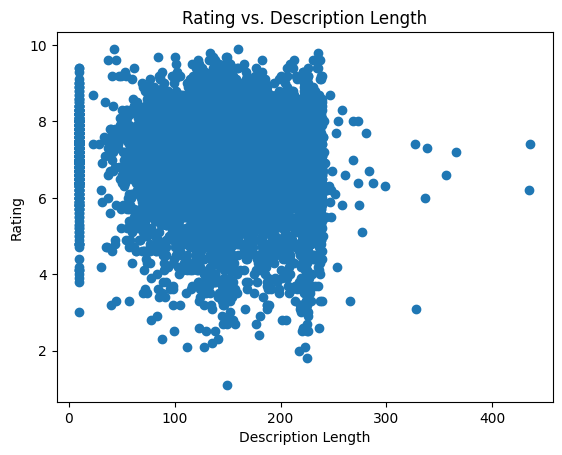

In [65]:
movies_df["DESCRIPTION LENGTH"] = [len(s) for s in movies_df["ONE-LINE"]]

short_df = movies_df[["MOVIES", "DESCRIPTION LENGTH", "RATING"]].dropna(subset = ["RATING"])

short_df.head()
lengths =  short_df["DESCRIPTION LENGTH"]
ratings = short_df["RATING"]
print(lengths)
print(ratings)
fig, ax = plt.subplots()

ax.scatter(lengths, ratings)
ax.set_xlabel("Description Length")
ax.set_ylabel("Rating")
plt.title ("Rating vs. Description Length")


## Bonus Questions
* What genre is the most popular by rating?
* What genre is the most popular by gross revenue?

In [66]:
movies_df["GENRE LIST"] = [x.strip().split(",") for x in movies_df["GENRE"]]
movies_df["GENRE1"] = [x[0] for x in movies_df[ "GENRE LIST"]]
movies_df["GENRE2"] = [x[1] if len(x) > 1 else "" for x in movies_df["GENRE LIST"]]
movies_df["GENRE3"] = [x[2] if len(x) > 2 else "" for x in movies_df["GENRE LIST"]]



Text(0.7, 0.5, 'Best Genre: War (8.2) \nWorst Genre: Horror (5.04)')

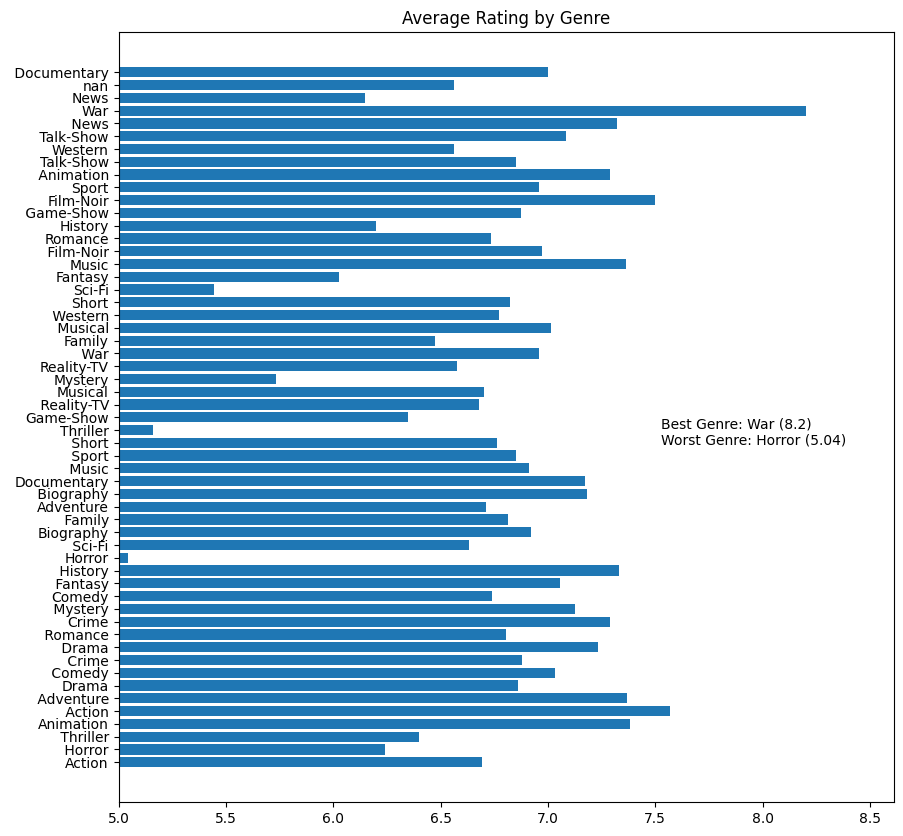

In [89]:
movies_df =  movies_df[["MOVIES", "START YEAR", "END YEAR", "GENRE1", "GENRE2", "GENRE3", "GENRE LIST", "RATING", "ONE-LINE", "DIRECTORS", "ACTORS", "VOTES", "RunTime", "Gross"]]
genres = {}
for i in movies_df.index:
    if math.isnan(movies_df["RATING"][i]):
            continue
    for g in movies_df["GENRE LIST"][i]:
        if g == "": 
             continue
        if g in genres:
            genres[g].append(movies_df["RATING"][i])
        else:
            genres[g] = [movies_df["RATING"][i]]

#calculate avg rating
for g in genres:
    genres[g] = np.average(genres[g])

#calc std to see significance of variation
stdd = np.std(list(genres.values()))

fig, ax = plt.subplots(figsize = (10, 10))
ax.barh(list(genres.keys()), list(genres.values()))
ax.set_xlim(5)
plt.title("Average Rating by Genre")
plt.text(0.7, 0.5, 
         f"Best Genre: War ({genres["War"]}) \nWorst Genre: Horror ({round(genres["Horror"], 2)})", 
         transform=ax.transAxes, 
         horizontalalignment = 'left', verticalalignment = 'top',
         fontsize = 10)

